# Predicting Bike Rentals

Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

You can have the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)
Description of the data : 
| Column | Description |
| ----------- | ----------- |
| instant | A unique sequential ID number for each row |
| dteday | The date of the rentals |
| season | The season in which the rentals occurred |
| yr | The year the rentals occurred |
| mnth | The month the rentals occurred |
| hr | The hour the rentals occurred |
| holiday | Whether or not the day was a holiday (0:not holiday ; 1: holiday)|
| weekday | TThe day of the week (as a number, 0 to 7) |
| workingday | Whether or not the day was a working day |
| weathersit | The weather (as a categorical variable) |
| temp | The temperature, on a 0-1 scale |
| atemp | The adjusted temperature |
| hum | The humidity, on a 0-1 scale |
| windspeed | The wind speed, on a 0-1 scale |
| casual | The number of casual riders (people who hadn't previously signed up with the bike sharing program) |
| registered | The number of registered riders (people who had already signed up) |
| cnt | The total number of bike rentals (casual + registered) |

Our purpose in this project is to predict the total number of bikes people rented in a given hour. You'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, you'll create a few different machine learning models and evaluate their performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Read our dataset
bike_rentals = pd.read_csv("bike_rental_hour.csv")

bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


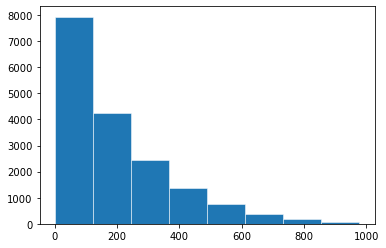

In [2]:
# Let's take a look at the distribution of the total rental
plt.hist(bike_rentals["cnt"], bins=8,linewidth=0.5, edgecolor="white")
plt.show()

In [3]:
# See how each column is correlated with cnt
bike_rentals.corr()["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

We can see that *cnt* column is more correlate with *redistered* and *casual* columns. But it's normal this correlation because cnt is derived from them.

## Calculating Features
To improve the accuracy of our models we're going to introduce new information like create a new column to specify the moment of the day the **hr** column belongs to. That helps the models to understand that certain hours are related.

In [4]:
def assign_label(hr):
    if(hr >= 6 and hr<12):
        result = 1
    elif(hr >=12 and hr < 18):
        result = 2
    elif(hr >=18 and hr <24):
        result = 3
    else: result=4
    return result

# Apply assign_label to hr column
bike_rentals["time_label"] = bike_rentals["hr"].apply(lambda hr: assign_label(hr))


### Error metric

Based on the explorations of the **cnt** column, the column have a continuous numeric data so the best metric is going to be *Mean Squared Error* (MSE)

## Splitting the data into Train and Test Sets

We're going to use 80% of the rows in the data set to be part of the training set and the remaining rows for the testing set.


In [5]:
train = bike_rentals.sample(frac = .8)

test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Applying Linear Regression


In [6]:
predictors = set(bike_rentals.columns.difference(["cnt","casual","dteday","registered"]))
target = "cnt"
print(predictors)
lr = LinearRegression()
# Train the model
lr.fit(train[predictors],train[target])
# Test the model
predictions_lr = lr.predict(test[predictors])
mse = mean_squared_error(test[target], predictions_lr)
print("=========== MSE ==========")
print(mse)

{'time_label', 'atemp', 'instant', 'temp', 'yr', 'mnth', 'season', 'weathersit', 'windspeed', 'hum', 'workingday', 'hr', 'weekday', 'holiday'}
=========== MSE ==========
17719.45927475363


## Applying Decision Tree Regressor

In [7]:
dtr = DecisionTreeRegressor()
dtr.fit(train[predictors],train[target])
predictions_dtr = dtr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_dtr)
print("=========== MSE with min_samples_leaf= 1 ==========")
print(mse)

dtr = DecisionTreeRegressor(min_samples_leaf=3)
dtr.fit(train[predictors],train[target])
predictions_dtr = dtr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_dtr)
print("=========== MSE with min_samples_leaf= 3 ==========")
print(mse)

dtr = DecisionTreeRegressor(min_samples_leaf=5)
dtr.fit(train[predictors],train[target])
predictions_dtr = dtr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_dtr)
print("=========== MSE with min_samples_leaf= 5 ==========")
print(mse)



=========== MSE with min_samples_leaf= 1 ==========
3178.2859608745684
=========== MSE with min_samples_leaf= 3 ==========
2386.592649836977
=========== MSE with min_samples_leaf= 5 ==========
2385.5800840717043


By comparing the 2 models, we can conclure that the **decision tree regressor model** is more accurate than the **linear regression model**. Let's try the **random forest model**
## Applying Random Forest Regressor

In [8]:
rfr = RandomForestRegressor()
rfr.fit(train[predictors],train[target])
predictions_rfr = rfr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_rfr)
print("=========== MSE with min_samples_leaf= 1 ==========")
print(mse)

rfr = RandomForestRegressor(min_samples_leaf=3)
rfr.fit(train[predictors],train[target])
predictions_rfr = rfr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_rfr)
print("=========== MSE with min_samples_leaf= 3 ==========")
print(mse)

rfr = RandomForestRegressor(min_samples_leaf=5)
rfr.fit(train[predictors],train[target])
predictions_rfr = rfr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_rfr)
print("=========== MSE with min_samples_leaf= 5 ==========")
print(mse)

=========== MSE with min_samples_leaf= 1 ==========
1576.7225443037976
=========== MSE with min_samples_leaf= 3 ==========
1598.8779587417011
=========== MSE with min_samples_leaf= 5 ==========
1755.298807347662


Knowing that **Random Forests** tend to overfit much less than **Decission Trees**, this explain his higher accuracy.

## Changing our target 

Let's rebuild our models with the origin of our target that is *casual* and *registered* columns and judge the accuracy.

In [9]:
target = ["casual","registered"]
print("\n ========== BUILD LINEAR REGRESSION ================= \n")
lr = LinearRegression()
# Train the model
lr.fit(train[predictors],train[target])
# Test the model
predictions_lr = lr.predict(test[predictors])
print("=========== MSE ==========")
mse = mean_squared_error(test[target], predictions_lr)
print(mse)
print("\n ========== BUILD DECISION TREE REGRESSOR ================= \n")
dtr = DecisionTreeRegressor()
dtr.fit(train[predictors],train[target])
predictions_dtr = dtr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_dtr)
print("=========== MSE with min_samples_leaf= 1 ==========")
print(mse)

dtr = DecisionTreeRegressor(min_samples_leaf=3)
dtr.fit(train[predictors],train[target])
predictions_dtr = dtr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_dtr)
print("=========== MSE with min_samples_leaf= 3 ==========")
print(mse)

dtr = DecisionTreeRegressor(min_samples_leaf=5)
dtr.fit(train[predictors],train[target])
predictions_dtr = dtr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_dtr)
print("=========== MSE with min_samples_leaf= 5 ==========")
print(mse)
print("\n ========== BUILD RANDOM FOREST REGRESSOR ================= \n")
rfr = RandomForestRegressor()
rfr.fit(train[predictors],train[target])
predictions_rfr = rfr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_rfr)
print("=========== MSE with min_samples_leaf= 1 ==========")
print(mse)

rfr = RandomForestRegressor(min_samples_leaf=3)
rfr.fit(train[predictors],train[target])
predictions_rfr = rfr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_rfr)
print("=========== MSE with min_samples_leaf= 3 ==========")
print(mse)

rfr = RandomForestRegressor(min_samples_leaf=5)
rfr.fit(train[predictors],train[target])
predictions_rfr = rfr.predict(test[predictors])
mse = mean_squared_error(test[target],predictions_rfr)
print("=========== MSE with min_samples_leaf= 5 ==========")
print(mse)


 ========== BUILD LINEAR REGRESSION ================= 

=========== MSE ==========
7404.115291093519

 ========== BUILD DECISION TREE REGRESSOR ================= 

=========== MSE with min_samples_leaf= 1 ==========
1225.0563866513235
=========== MSE with min_samples_leaf= 3 ==========
1040.890102768188
=========== MSE with min_samples_leaf= 5 ==========
1057.5460792383271

 ========== BUILD RANDOM FOREST REGRESSOR ================= 

=========== MSE with min_samples_leaf= 1 ==========
722.0272021145
=========== MSE with min_samples_leaf= 3 ==========
761.3535568769928
=========== MSE with min_samples_leaf= 5 ==========
826.6169309812587


By the result, we can say the changement of target really improve the accuracy of our models so the best choice as target is the combination of *casual* and *registered* column